In [1]:
from iterator import PredicateIterator
from utils.visualization_utils import get_att_map, objdict, get_dict
from keras.models import load_model

import numpy as np
import os
from PIL import Image
import json
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


# VRD


In [ ]:
annotations_test = json.load(open("data/VRD/annotations_test.json"))
test_data_dir = 'data/predicate-vrd/test'
img_dir = '/data/chami/VRD/sg_dataset/sg_test_images/'
vocab_dir = os.path.join('data/VRD')
model_checkpoint = "temp/pred-vrd/model49-1.08.h5"

# Clevr

In [2]:
annotations_test = json.load(open("/data/ranjaykrishna/ReferringRelationships/data/clevr/annotations_test.json"))

In [3]:
test_data_dir = '/data/ranjaykrishna/ReferringRelationships/data/predicate-clevr-small/test'
img_dir = '/data/ranjaykrishna/clevr/images/val/'
vocab_dir = '/data/chami/ReferringRelationships/data/Clevr/'
model_checkpoint = "/data/chami/ReferringRelationships/models/Clevr/10_14_2017/2/model04-0.13.h5"

### Setup

In [4]:
predicate_dict, obj_subj_dict = get_dict(vocab_dir)
image_ids = sorted(list(annotations_test.keys()))[:1000]
params = objdict(json.load(open(os.path.join(os.path.dirname(model_checkpoint), "args.json"), "r")))
params.nb_conv_move_map = 3
if params.model == 'ssn':
    from ssn import ReferringRelationshipsModel
else:
    from model import ReferringRelationshipsModel
relationships_model = ReferringRelationshipsModel(params)
test_generator = PredicateIterator(test_data_dir, params)
images = test_generator.get_image_dataset()
subj_id = np.zeros((1, 1))
predicate_id = np.zeros((1, 1))
obj_id = np.zeros((1, 1))

### Load the model.

In [5]:
model = relationships_model.build_model()
model.load_weights(model_checkpoint)

### USER INPUT - Pick an image 

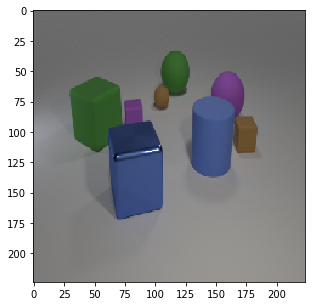

In [6]:
#################
image_index = 125
#################
img = Image.open(os.path.join(img_dir, image_ids[image_index]))
img = img.resize((params.input_dim, params.input_dim))
plt.figure(figsize=(5,5))
plt.imshow(img)

### USER INPUT - Pick a relationship 

In [15]:
#################
subj = "brown_rubber_cube"
predicate = "right"
obj = "blue_metal_cube"
#################
relationship = [subj, predicate, obj]
subj_id[0, 0] = obj_subj_dict.index(subj)
predicate_id[0, 0] = predicate_dict.index(predicate)
obj_id[0, 0] = obj_subj_dict.index(obj)

### Run the model and visualize the heatmaps.

In [16]:
subject_heatmap, object_heatmap = model.predict([images[image_index:image_index+1], subj_id, predicate_id, obj_id])

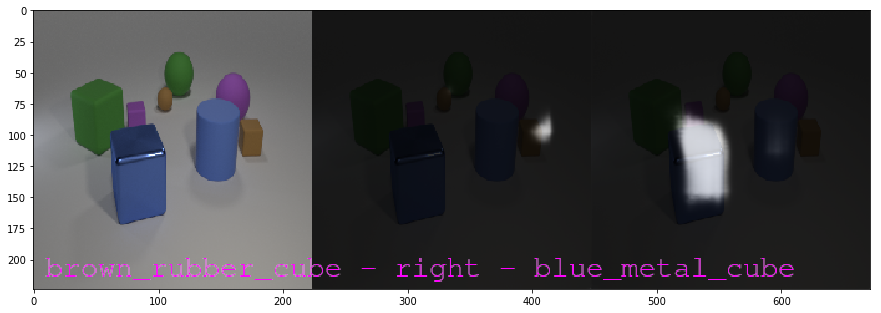

In [17]:
att_map = get_att_map(img, subject_heatmap[0], object_heatmap[0], params.input_dim, relationship)
plt.figure(figsize=(15, 15))
plt.imshow(att_map)